# Multi Layer Perceptron (MLP) with PyTorch

In [1]:
import copy
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchview
from IPython.display import Image, display
import numpy as np
import matplotlib.pyplot as plt
# declare colors for the plot
colors = {"orange": "#FF4B00", "blue": "#005AFF", "green": "#03AF7A"}

## Create Dataset

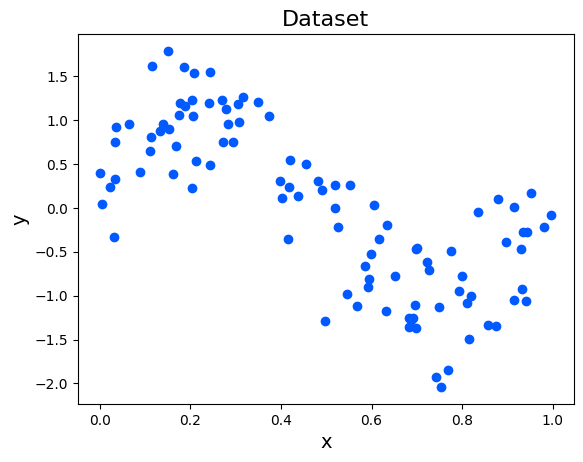

In [2]:
# create dataset
torch.manual_seed(0)
x_dataset = torch.rand(100, 1)
y_dataset = torch.sin(2 * torch.pi * x_dataset) + 0.5 * torch.randn(100, 1)

# plot dataset
plt.title('Dataset', fontsize=16)
plt.scatter(x_dataset.numpy(), y_dataset.numpy(), color=colors["blue"])
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

## Create Model (Multi-Layer Perceptron)

In [3]:
class Model(nn.Module):
    def __init__(self, input_size=1, hidden_size=10, output_size=1):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        y = self.linear1(x)
        y = F.sigmoid(y)
        y = self.linear2(y)
        return y

## Train the Model

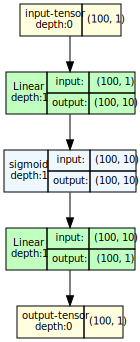

iteration:      0, loss: 0.9204
iteration:   1000, loss: 0.3923
iteration:   2000, loss: 0.3817
iteration:   3000, loss: 0.3393
iteration:   4000, loss: 0.2458
iteration:   5000, loss: 0.2069
iteration:   6000, loss: 0.2035
iteration:   7000, loss: 0.2024
iteration:   8000, loss: 0.2017
iteration:   9000, loss: 0.2011
iteration:   9999, loss: 0.2007


In [4]:
# parameters
learning_rate = 0.2 # learning rate
num_iter = 10000 # number of iterations

# create model and optimizer
model = Model()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# visualize the model with torchview
model_graph = torchview.draw_graph(copy.deepcopy(model), input_size=x_dataset.shape)
display(model_graph.visual_graph)

# do training for num_iter iterations
for i in range(num_iter):
    # generate current prediction
    y_prediction = model(x_dataset)

    # calculate current loss
    loss = F.mse_loss(y_dataset, y_prediction)

    # backpropagation
    loss.backward()

    # update weight parameters of the model
    optimizer.step()

    # initialize gradients to zero
    optimizer.zero_grad()

    # print loss every 1000 iterations
    if i % 1000 == 0:
        print(f'iteration: {i:6d}, loss: {loss.item():.4f}')

print(f'iteration: {i:6d}, loss: {loss.item():.4f}')

## Plot the Prediction

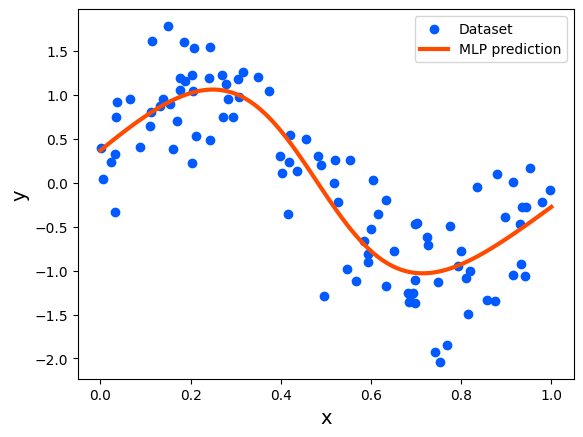

In [5]:
# plot dataset
plt.scatter(x_dataset.numpy(), y_dataset.numpy(), color=colors["blue"], label="Dataset")

# plot prediction of the trained model
x_tensor = torch.linspace(0, 1, 100).view(-1, 1)
y_tensor = model(x_tensor)
plt.plot(x_tensor.detach().numpy(), y_tensor.detach().numpy(), color=colors["orange"], linewidth=3, label="MLP prediction")
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
# plt.savefig('mlp.png', dpi=300) # save figure
plt.show()